In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/ab-test.csv')

In [3]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [4]:
boxprops = {'linewidth': 3, 'color': 'green'}
whiskerprops = { 'color': 'red'}
capprops = { 'color': 'red'}
medianprops = {'linewidth': 2, 'color': 'red'}
flierprops = {'marker': 'o', 'markersize': 5}


In [5]:
pivot_df = df.pivot_table(index='uid', 
                         columns=['group', 'time'], 
                         values='diff')


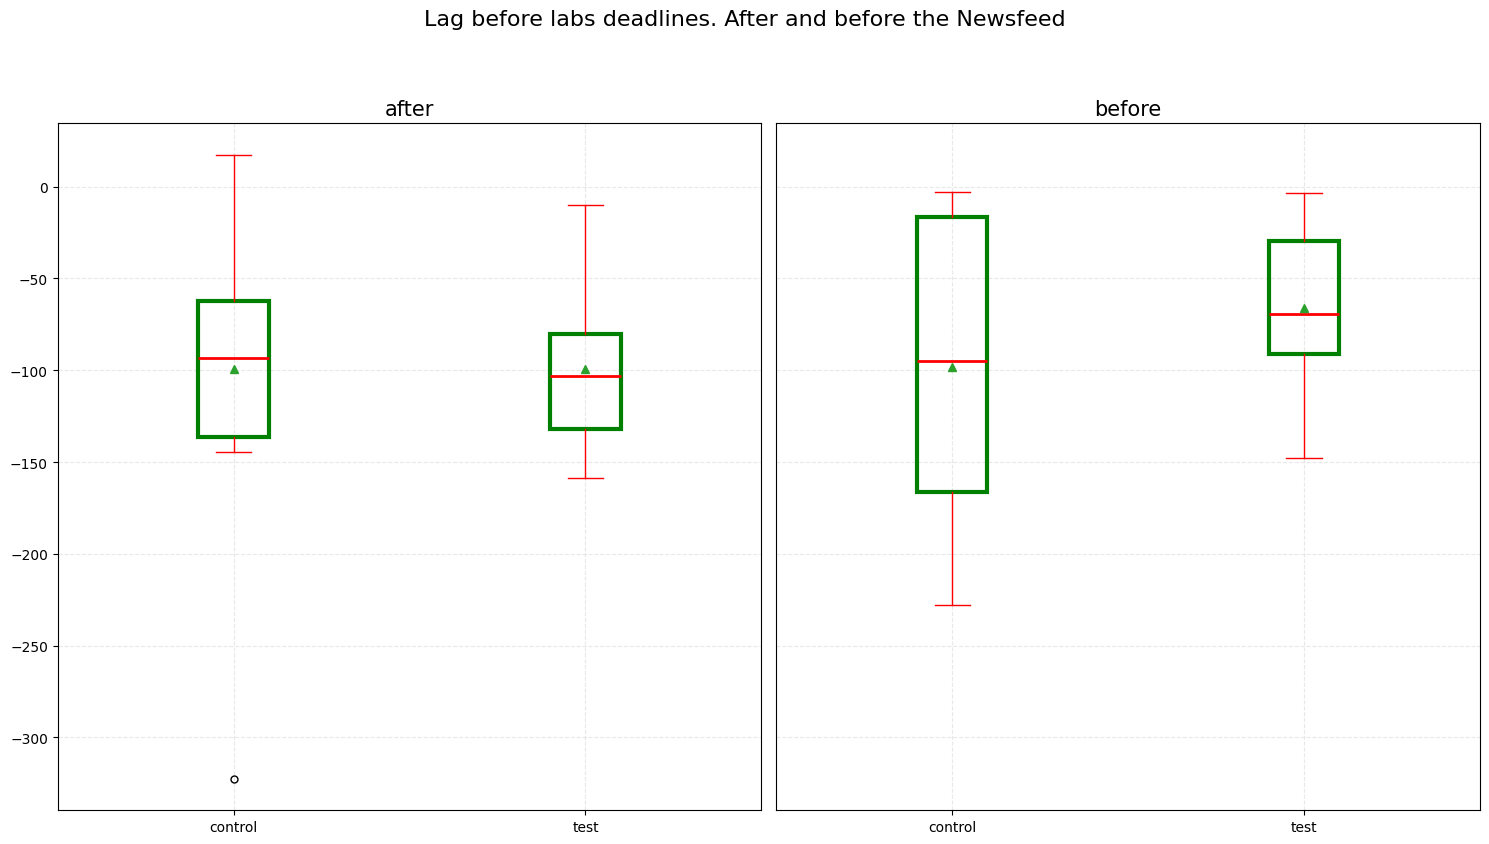

In [6]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(15, 8))
for i, group in enumerate(['control', 'test'], 1):
    data = pivot_df[(group, 'before')].dropna().values
    ax1.boxplot([data],
               positions=[i],
               patch_artist=True,
               boxprops=dict(facecolor='none', **boxprops),
               whiskerprops=whiskerprops,
               capprops=capprops,
               medianprops=medianprops,
               showmeans=True,
               flierprops=flierprops,
               widths=0.2)

for i, group in enumerate(['control', 'test'], 1):
    data = pivot_df[(group, 'after')].dropna().values
    ax2.boxplot([data],
               positions=[i],
               patch_artist=True,
               boxprops=dict(facecolor='none', **boxprops),
               whiskerprops=whiskerprops,
               capprops=capprops,
               medianprops=medianprops,
               showmeans=True,
               flierprops=flierprops,
               widths=0.2)

ax1.set_title('before', fontsize=15)
ax1.set_xticks([1, 2], ['control', 'test'])
ax1.grid(True, color='lightgray', alpha=0.5, linestyle='--')

ax2.set_title('after', fontsize=15)
ax2.set_xticks([1, 2], ['control', 'test'])
ax2.grid(True, color='lightgray', alpha=0.5, linestyle='--')

# Общий заголовок
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=16, y=1.05)

# Синхронизация осей Y
ax1.sharey(ax2)
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)

plt.tight_layout()
plt.show()

What was the IQR of the control group before the newsfeed?

150